<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/NDDT/NDDT_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

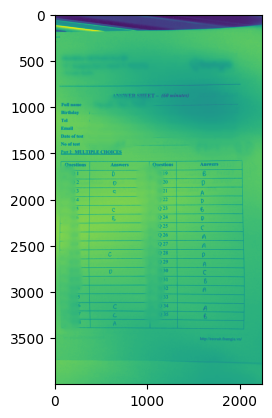

In [ ]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2

img0 = "./multiple_choice.jpg"
img = cv2.imread(img0, 0)

plt.imshow(img)
plt.show()


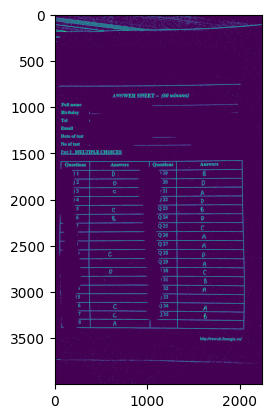

In [ ]:
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.imshow(thresh)

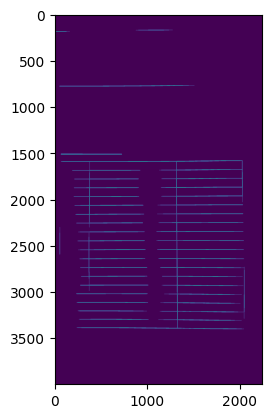

In [ ]:
horizal = thresh
vertical = thresh

scale_height = 20 #Scale này để càng cao thì số dòng dọc xác định sẽ càng nhiều
scale_long = 10

long = int(img.shape[1]/scale_long)
height = int(img.shape[0]/scale_height)

horizalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (long, 1))
horizal = cv2.erode(horizal, horizalStructure, (-1, -1))
horizal = cv2.dilate(horizal, horizalStructure, (-1, -1))

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, height))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))

mask = vertical + horizal
plt.imshow(mask)

In [ ]:
contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max = -1
cv2_borders = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) > max:
        x_max, y_max, w_max, h_max = x, y, w, h
        max = cv2.contourArea(cnt)


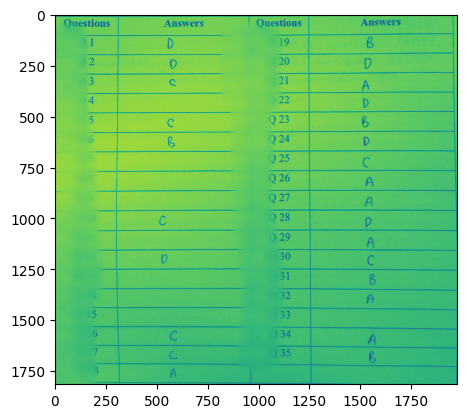

In [ ]:
table = img[y_max:y_max+h_max, x_max:x_max+w_max]
plt.imshow(table)
plt.show()

In [ ]:
cropped_thresh_img = []
cropped_origin_img = []
countours_img = []

NUM_ROWS = 19
START_ROW = 1
for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(w_max/6):x_max +round(w_max/2)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)

for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS):y_max + round((i+1)*h_max/NUM_ROWS), x_max + round(2*w_max/3):x_max +round(w_max)]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)


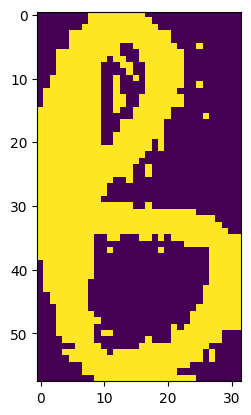

In [ ]:
for i, countour_img in enumerate(countours_img):
    for cnt in countour_img:
        if cv2.contourArea(cnt) > 30:
             x,y,w,h = cv2.boundingRect(cnt)
             if x > cropped_origin_img[i].shape[1]*0.1 and x < cropped_origin_img[i].shape[1]*0.9:
                 answer = cropped_origin_img[i][y:y+h, x:x+w]
                 answer = cv2.threshold(answer, 160, 255, cv2.THRESH_BINARY_INV)[1]

plt.imshow(answer)
plt.show()

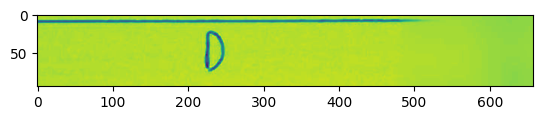

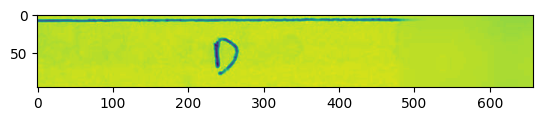

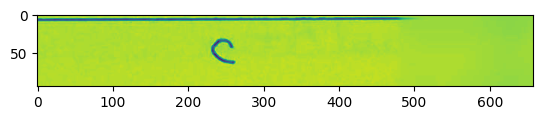

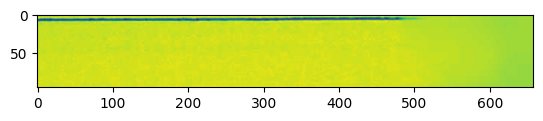

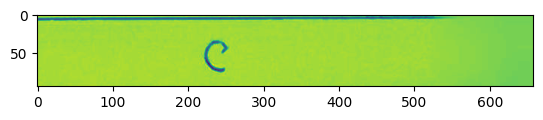

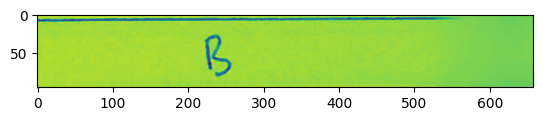

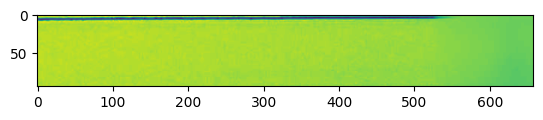

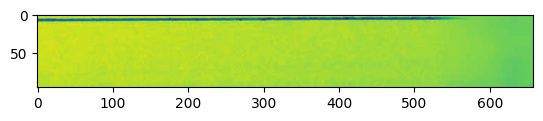

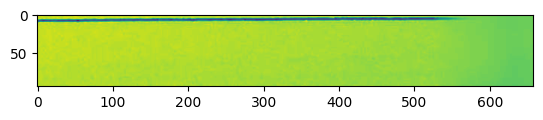

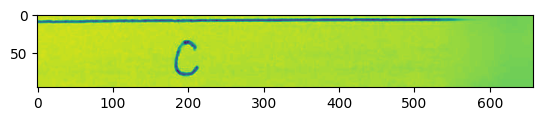

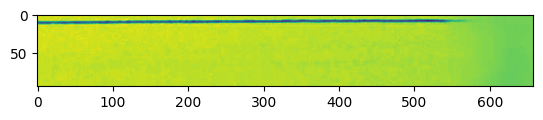

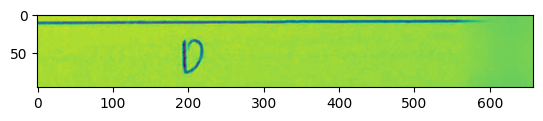

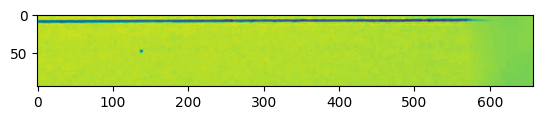

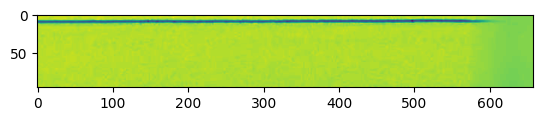

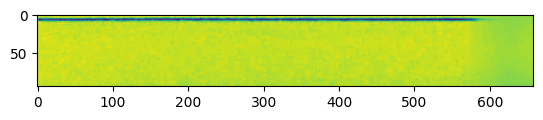

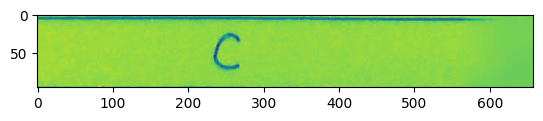

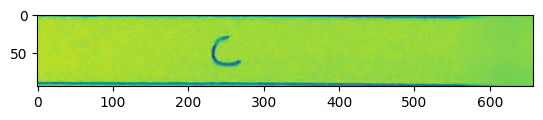

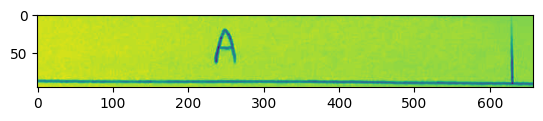

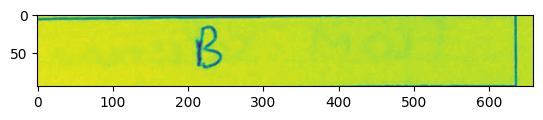

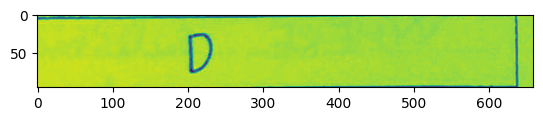

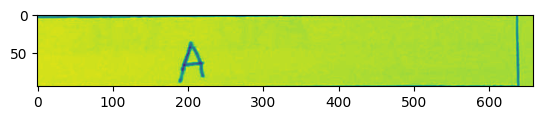

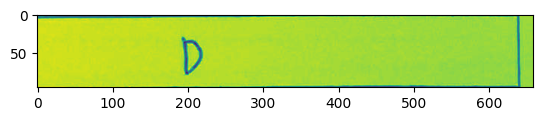

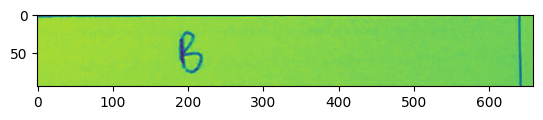

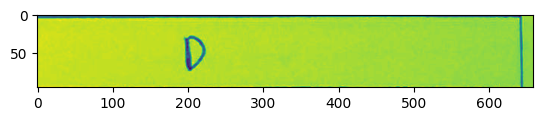

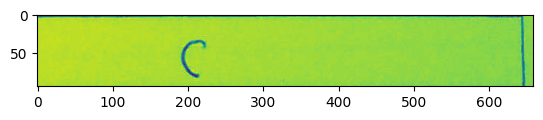

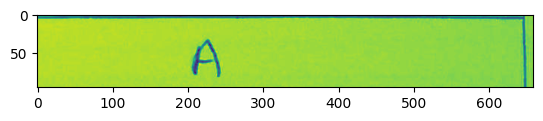

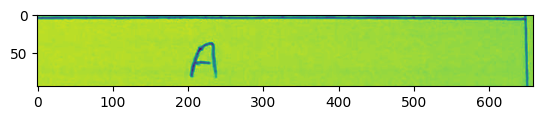

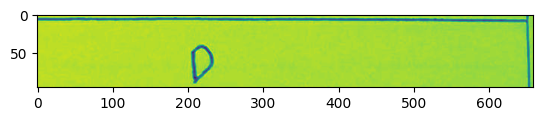

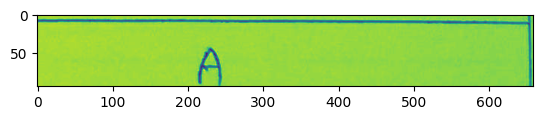

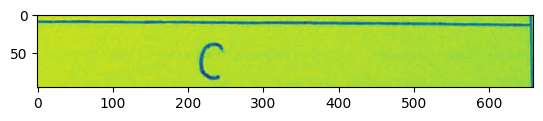

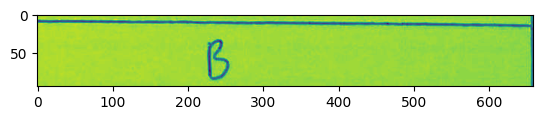

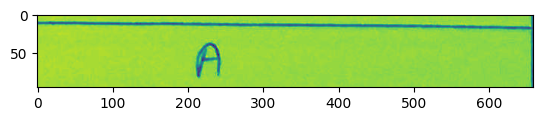

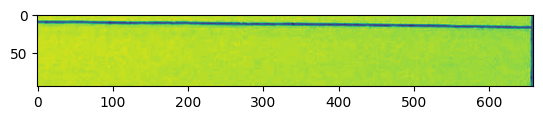

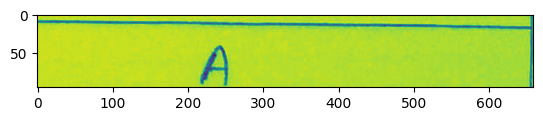

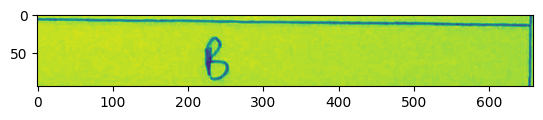

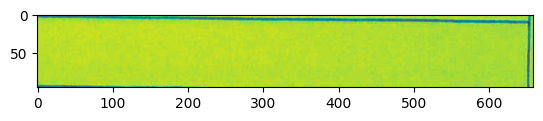

In [ ]:
for i in range(len(cropped_origin_img)):
  plt.imshow(cropped_origin_img[i])
  plt.show()